In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, preprocessing, metrics, model_selection
import mlflow
import mlflow.sklearn

In [2]:
data = pd.read_csv("../data/dataset_kobe.csv")

In [3]:
data = data[data["shot_type"] == "2PT Field Goal"][["lat", "lon", "minutes_remaining", "period", "playoffs", "shot_distance", "shot_made_flag"]]
data = data.dropna()
data.to_parquet("../data/processed/data_filtered.parquet")

In [4]:
X = data.drop('shot_made_flag', axis=1)
X

,lat,lon,minutes_remaining,period,playoffs,shot_distance
1,34.0443,-118.4268,10,1,0,15
2,33.9093,-118.3708,7,1,0,16
3,33.8693,-118.1318,6,1,0,22
4,34.0443,-118.2698,6,2,0,0
5,34.0553,-118.4148,9,3,0,14
...,...,...,...,...,...,...
30690,33.9443,-118.3828,11,4,1,15
30691,34.0443,-118.2698,7,4,1,0
30692,33.9963,-118.2688,6,4,1,4
30694,33.8783,-118.4038,3,4,1,21


In [5]:
y = data['shot_made_flag'] 
y

1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
        ... 
30690    0.0
30691    0.0
30692    0.0
30694    1.0
30696    0.0
Name: shot_made_flag, Length: 20285, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
y_train

7006     0.0
20760    0.0
15143    0.0
10506    1.0
21377    0.0
        ... 
29740    0.0
23272    1.0
6023     1.0
1104     1.0
27185    1.0
Name: shot_made_flag, Length: 16228, dtype: float64

In [8]:
X_train

,lat,lon,minutes_remaining,period,playoffs,shot_distance
7006,34.0343,-118.1288,1,2,0,14
20760,33.9723,-118.0808,0,3,0,20
15143,33.8713,-118.1728,11,3,0,19
10506,34.0443,-118.2698,11,2,0,0
21377,33.8543,-118.2698,11,3,0,19
...,...,...,...,...,...,...
29740,34.0523,-118.0718,9,3,1,19
23272,34.0443,-118.2698,0,1,0,0
6023,34.0523,-118.0838,2,3,0,18
1104,34.0403,-118.3618,3,3,0,9


In [9]:
from pycaret.classification import *

# inicializa a configuração do pyCaret com os dados de treinamento e identificador de sessão
setup(data=X_train, target=y_train, session_id=123)

# treina o modelo de regressão logística
lr_model = create_model('lr')
lr_model

,Description,Value
0,Session id,123
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5827,0.6132,0.4815,0.5749,0.5241,0.1578,0.1597
1,0.5731,0.5971,0.4926,0.5597,0.5240,0.1398,0.1408
2,0.5625,0.6087,0.4945,0.5458,0.5189,0.1195,0.1200
3,0.5625,0.5855,0.4760,0.5478,0.5094,0.1181,0.1191
4,0.5651,0.5791,0.4631,0.5529,0.5040,0.1222,0.1237
5,0.6109,0.6517,0.5258,0.6064,0.5632,0.2156,0.2174
6,0.5810,0.5754,0.4871,0.5714,0.5259,0.1548,0.1563
7,0.5880,0.6075,0.4899,0.5821,0.5320,0.1689,0.1709
8,0.5863,0.5947,0.5138,0.5753,0.5428,0.1672,0.1681


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
from sklearn.metrics import log_loss, f1_score

test_predictions = predict_model(lr_model, data=X_test)

# extrai o valor real do conjunto de teste
test_y = y_test

# calcula a métrica log loss entre a previsão e os valores reais
log_loss_value = log_loss(test_y, test_predictions['prediction_label'])
log_loss_value

15.423165463028685

In [11]:
metrics = {
        'log_loss_value': log_loss_value,
    }

metrics

{'log_loss_value': 15.423165463028685}

In [12]:
metrics = {
        'train_df_size': X_train.shape[0],
        'test_df_size': X_test.shape[0],
        'test_size_perc': 0.2
    }

In [13]:
metrics

{'train_df_size': 16228, 'test_df_size': 4057, 'test_size_perc': 0.2}

In [14]:
def split_metrics(X_train, X_test, test_size):
    metrics = {
        'train_df_size': X_train.shape[0],
        'test_df_size': X_test.shape[0],
        'test_size_perc': test_size
    }

    return {
        key: {'value': float(value), 'step': 1}
        for key, value in metrics.items()
    }

In [15]:
split_metrics(X_train, X_test, test_size = 0.2)

{'train_df_size': {'value': 16228.0, 'step': 1},
 'test_df_size': {'value': 4057.0, 'step': 1},
 'test_size_perc': {'value': 0.2, 'step': 1}}

In [19]:
from sklearn.model_selection import train_test_split

X = data.drop('shot_made_flag', axis=1)  
y = data['shot_made_flag']  

# dividir os dados em conjuntos de treinamento e teste, com uma divisão aleatória e estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

,Description,Value
0,Session id,123
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5827,0.6132,0.4815,0.5749,0.5241,0.1578,0.1597
1,0.5731,0.5971,0.4926,0.5597,0.5240,0.1398,0.1408
2,0.5625,0.6087,0.4945,0.5458,0.5189,0.1195,0.1200
3,0.5625,0.5855,0.4760,0.5478,0.5094,0.1181,0.1191
4,0.5651,0.5791,0.4631,0.5529,0.5040,0.1222,0.1237
5,0.6109,0.6517,0.5258,0.6064,0.5632,0.2156,0.2174
6,0.5810,0.5754,0.4871,0.5714,0.5259,0.1548,0.1563
7,0.5880,0.6075,0.4899,0.5821,0.5320,0.1689,0.1709
8,0.5863,0.5947,0.5138,0.5753,0.5428,0.1672,0.1681


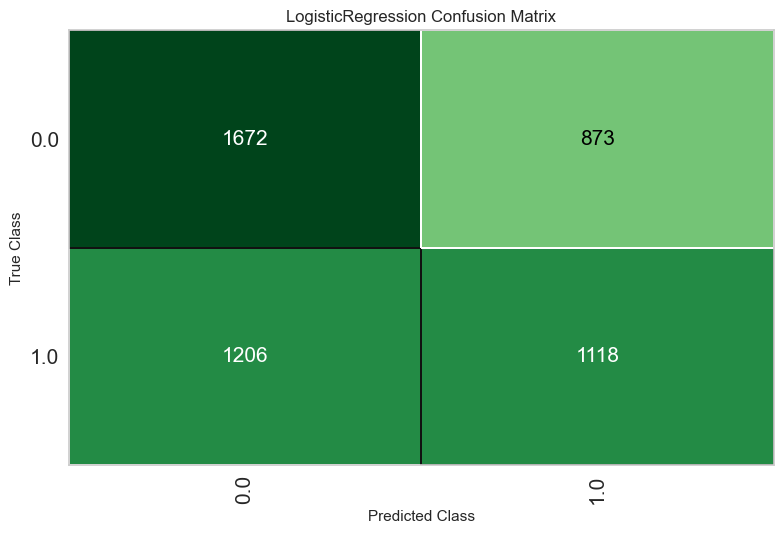

In [20]:
from pycaret.classification import *

# inicializa a configuração do pyCaret
setup(data=X_train, target=y_train, session_id=123)

# treina o modelo de regressão logística
lr_model = create_model('lr')

# avalia o desempenho do modelo
plot_model(lr_model, plot='confusion_matrix')

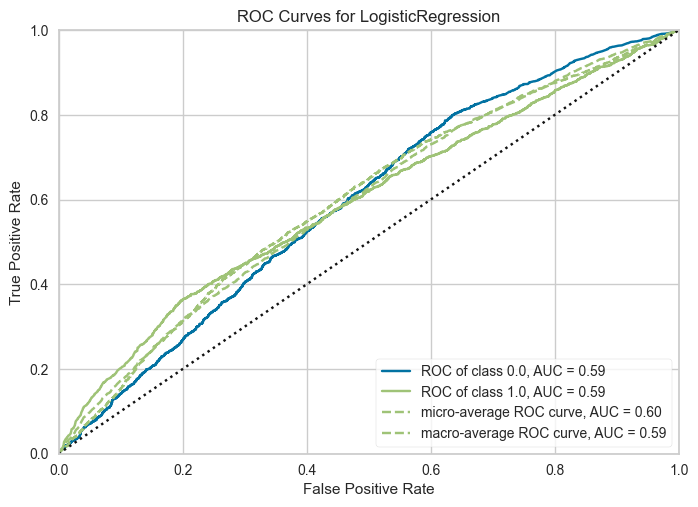

In [21]:
plot_model(lr_model, plot='auc')

In [22]:
from sklearn.metrics import log_loss
test_predictions = predict_model(lr_model, data=pd.DataFrame(X_test))
test_y = y_test
log_loss = log_loss(test_y, test_predictions['prediction_label'])
print(log_loss)

15.423165463028685


In [23]:
best_model = compare_models()

final_model = finalize_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5919,0.6020,0.3984,0.6114,0.4823,0.1695,0.1802,0.0850
gbc,Gradient Boosting Classifier,0.5887,0.6038,0.4141,0.6002,0.4899,0.1645,0.1724,0.1430
ridge,Ridge Classifier,0.5803,0.0000,0.4974,0.5691,0.5308,0.1543,0.1555,0.0150
lda,Linear Discriminant Analysis,0.5802,0.6037,0.4982,0.5689,0.5311,0.1542,0.1553,0.0280
lr,Logistic Regression,0.5798,0.6017,0.4934,0.5691,0.5284,0.1530,0.1543,0.0170
qda,Quadratic Discriminant Analysis,0.5796,0.6043,0.5483,0.5609,0.5544,0.1567,0.1568,0.0210
nb,Naive Bayes,0.5768,0.5980,0.5125,0.5623,0.5362,0.1486,0.1492,0.0130
lightgbm,Light Gradient Boosting Machine,0.5758,0.5965,0.4989,0.5624,0.5286,0.1455,0.1464,0.0630
rf,Random Forest Classifier,0.5584,0.5748,0.5297,0.5382,0.5338,0.1144,0.1145,0.2910
et,Extra Trees Classifier,0.5493,0.5677,0.5293,0.5278,0.5285,0.0968,0.0968,0.2720
